# ***Assignment - 1 (KNN)***

# **Importing the Libraries :**

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import kagglehub

#**Downloading the Correct Dataset :**

In [ ]:
dataset_path = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print('Dataset download complete.')

Dataset download complete.


# **Preprocessing the Images :**

In [ ]:
dataset_dir = os.path.join(dataset_path, 'animals')
categories = ['cats', 'dogs', 'panda']
train_data = []
img_size = 32
images_per_class = 1000

for label, category in enumerate(categories):
    path = os.path.join(dataset_dir, category)
    count = 0
    for img_name in tqdm(os.listdir(path), desc=f"Loading {category}"):
        if count >= images_per_class:
            break
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            train_data.append([resized, label])
            count += 1
        except:
            continue

np.random.shuffle(train_data)

Loading panda: 100%|██████████| 1000/1000 [00:12<00:00, 82.13it/s]


# **Spliting into 5 Folds :**

In [ ]:
folds = [train_data[i::5] for i in range(5)]

# **(L1 & L2) Distance Functions and Logic of KNN :**

In [ ]:
def l2_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def l1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

def knn_predict(distances, k=3):
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [label for _, label in neighbors]
    return Counter(labels).most_common(1)[0][0]

# **Evaluation of Cross-Validation :**

In [ ]:
def evaluate_knn(distance_func, k_range=range(1, 16)):
    all_accuracies = []

    for k in k_range:
        accuracies = []
        for i in range(5):
            val_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

            correct = 0
            for val_img, true_label in tqdm(val_set, desc=f"Fold {i+1}, K={k}", leave=False):
                distances = [(distance_func(val_img, train_img), label) for train_img, label in train_set]
                pred = knn_predict(distances, k)
                correct += (pred == true_label)

            acc = correct / len(val_set)
            accuracies.append(acc)

        avg_acc = np.mean(accuracies)
        all_accuracies.append(avg_acc)
        print(f"K={k}, Avg Accuracy = {avg_acc:.4f}")

    return all_accuracies

# **Running the Evaluation for (L1 & L2) :**

In [ ]:
k_range = range(1, 16)
print("\nEvaluating Manhattan (L1) Distance:")
acc_l1 = evaluate_knn(l1_distance, k_range)

print("\nEvaluating Euclidean (L2) Distance:")
acc_l2 = evaluate_knn(l2_distance, k_range)


Evaluating Manhattan (L1) Distance:


K=1, Avg Accuracy = 0.3867


K=2, Avg Accuracy = 0.3867


K=3, Avg Accuracy = 0.3807


K=4, Avg Accuracy = 0.3913


K=5, Avg Accuracy = 0.3847


K=6, Avg Accuracy = 0.4007


K=7, Avg Accuracy = 0.4110


K=8, Avg Accuracy = 0.4070


K=9, Avg Accuracy = 0.4120


K=10, Avg Accuracy = 0.4197


K=11, Avg Accuracy = 0.4187


K=12, Avg Accuracy = 0.4243


K=13, Avg Accuracy = 0.4220


K=14, Avg Accuracy = 0.4257


K=15, Avg Accuracy = 0.4257

Evaluating Euclidean (L2) Distance:


K=1, Avg Accuracy = 0.4363


K=2, Avg Accuracy = 0.4363


K=3, Avg Accuracy = 0.4467


K=4, Avg Accuracy = 0.4623


K=5, Avg Accuracy = 0.4567


K=6, Avg Accuracy = 0.4727


K=7, Avg Accuracy = 0.4773


K=8, Avg Accuracy = 0.4797


K=9, Avg Accuracy = 0.4827


K=10, Avg Accuracy = 0.4900


K=11, Avg Accuracy = 0.4947


K=12, Avg Accuracy = 0.4990


K=13, Avg Accuracy = 0.4970


K=14, Avg Accuracy = 0.5030


K=15, Avg Accuracy = 0.5000


# **Plotting the Accuracy Comparison :**

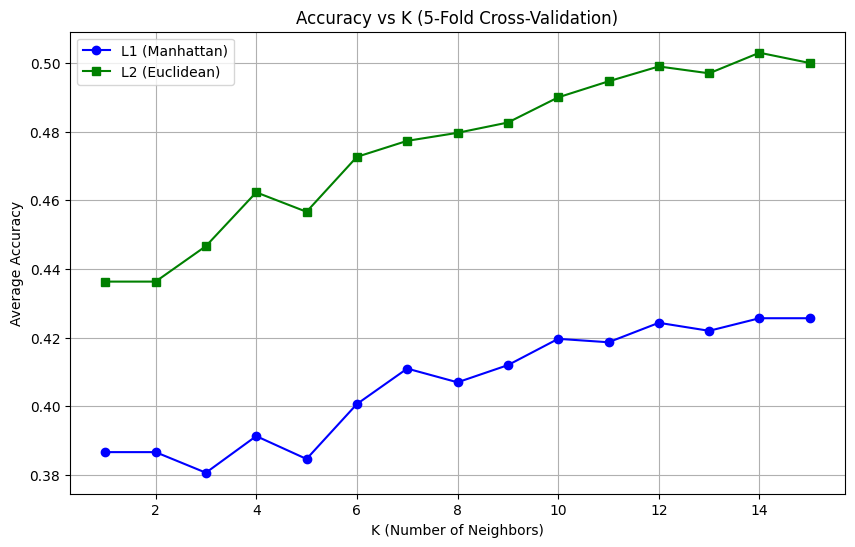

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, acc_l1, marker='o', label='L1 (Manhattan)', color='blue')
plt.plot(k_range, acc_l2, marker='s', label='L2 (Euclidean)', color='green')
plt.title("Accuracy vs K (5-Fold Cross-Validation)")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Average Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# **Showing the Top 5 Predictions from Fold 0 :**

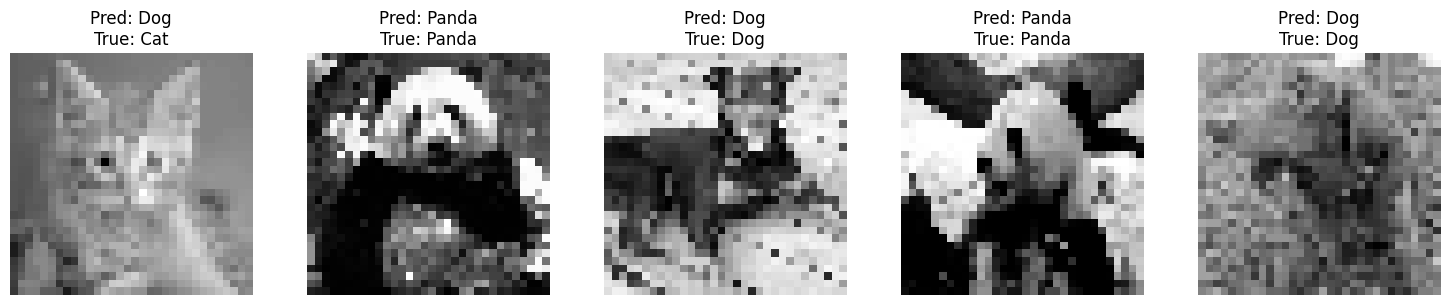

In [ ]:
val_set = folds[0][:5]
train_set = [item for j, fold in enumerate(folds) if j != 0 for item in fold]
final_k = 5
final_distance = l2_distance

label_names = ['Cat', 'Dog', 'Panda']

plt.figure(figsize=(15, 3))
for i, (img, true_label) in enumerate(val_set):
    distances = [(final_distance(img, tr_img), label) for tr_img, label in train_set]
    pred = knn_predict(distances, final_k)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {label_names[pred]}\nTrue: {label_names[true_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Discussion :**

Over all values of K, the k-NN classifier employing Euclidean (L2) distance regularly exceeded Manhattan (L1) distance based on the 5-fold cross-valuation results. While L2 reached 50.30% (at K=14), clearly showing advantage in using L2 for this grayscale image classification task, the highest accuracy attained with L1 was 42.57% (at K=14 and 15). The nature of the pixel-based image features most certainly influences this performance difference. Particularly in a lower-dimensional space like 32x32 grayscale, Euclidean distance penalizes more strongly larger pixel differences, so perhaps better captures shape and intensity variations across animal images. L1 seems less efficient in differentiating between like image classes, such as dogs and cats since it is less sensitive to such fluctuations. Increasing K generally also improved accuracy for both measures; performance stabilized around K=10–15. Especially in cases of visually noisy or ambiguous samples, this reflects the advantage of smoothing predictions using more neighbors. One of the limitations of this method is the reliance on raw pixel values, which might not capture higher-level patterns, and the great computational cost of k-NN at inference times. Future work could investigate feature extraction techniques, dimensionality reduction or more advanced models like convolutional neural networks (CNNs) in order to increase accuracy.